# Template of  jupyter notebook for analysis of SAXS/WAXS/GiSAXS/GiWAXS

## Load package

In [1]:
%matplotlib notebook
from pyScatt.packages import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })
T = True
F = False

## Define IO

In [2]:
inDir =  '/home/group/NSLSII_Data/SMI/2020_Cycle1/AB_CUNNY/AB2_1/'
print('The input dir is: %s'%inDir)



The input dir is: /home/group/NSLSII_Data/SMI/2020_Cycle1/AB_CUNNY/AB2_1/


In [3]:
outDir = '/home/group/NSLSII_Data/SMI/2020_Cycle1/AB_CUNNY/TestRes/'
outDir = create_fullpath(  outDir )

outDir_HDF =  create_dir(  'HDF_Results/', outDir )
outDir_PDF =  create_dir(  'PDF_Report/', outDir )

Directory  /home/group/NSLSII_Data/SMI/2020_Cycle1/AB_CUNNY/TestRes/  already exists
Directory  /home/group/NSLSII_Data/SMI/2020_Cycle1/AB_CUNNY/TestRes/HDF_Results/  already exists
Directory  /home/group/NSLSII_Data/SMI/2020_Cycle1/AB_CUNNY/TestRes/PDF_Report/  already exists


## Organize Data 
* the sorting method heavly relies on data acquisition strategy
* Currently, there is no general method for sorting

In [4]:

username_ = 'AB2'

flists = ls_dir( inDir, and_list=[  username_ ], no_list=[ ])
Nf = len( flists)
print('There are %s files for user: %s in this run.'%(Nf, username_))

There are 448 files for user: AB2 in this run.


In [5]:
flists

array(['AB2_1_1_MeDPP_glass_thermal_none_0.0800deg_x49350_waxs00.00_0.1s_000001_WAXS.tif',
       'AB2_1_1_MeDPP_glass_thermal_none_0.0800deg_x49350_waxs06.50_0.1s_000001_WAXS.tif',
       'AB2_1_1_MeDPP_glass_thermal_none_0.0800deg_x49350_waxs13.00_0.1s_000001_WAXS.tif',
       'AB2_1_1_MeDPP_glass_thermal_none_0.0800deg_x49350_waxs19.50_0.1s_000001_WAXS.tif',
       'AB2_1_1_MeDPP_glass_thermal_none_0.0800deg_x49550_waxs00.00_0.1s_000001_WAXS.tif',
       'AB2_1_1_MeDPP_glass_thermal_none_0.0800deg_x49550_waxs06.50_0.1s_000001_WAXS.tif',
       'AB2_1_1_MeDPP_glass_thermal_none_0.0800deg_x49550_waxs13.00_0.1s_000001_WAXS.tif',
       'AB2_1_1_MeDPP_glass_thermal_none_0.0800deg_x49550_waxs19.50_0.1s_000001_WAXS.tif',
       'AB2_1_1_MeDPP_glass_thermal_none_0.0800deg_x49750_waxs00.00_0.1s_000001_WAXS.tif',
       'AB2_1_1_MeDPP_glass_thermal_none_0.0800deg_x49750_waxs06.50_0.1s_000001_WAXS.tif',
       'AB2_1_1_MeDPP_glass_thermal_none_0.0800deg_x49750_waxs13.00_0.1s_000001_WAXS.tif',

### Using a two-layered dict to sort the files 

In [6]:
%run -i /home/yuzhang/Software/pyScatt/pyScatt/generic_functions.py

In [7]:
cut_pattern= r'[_][w][a]'
sam_dict, sams = get_Unique_SamDict_from_list( flists, cut_pattern= cut_pattern, starting_point=0,     )   
ks =  sorted(list(sams.keys()))
N = len(ks)
print( 'There are %s samples.'%(N))

There are 112 samples.


In [8]:
ks[0], sam_dict[ks[0]]

('AB2_1_1_MeDPP_glass_thermal_none_0.0800deg_x49350',
 ['AB2_1_1_MeDPP_glass_thermal_none_0.0800deg_x49350_waxs00.00_0.1s_000001_WAXS.tif',
  'AB2_1_1_MeDPP_glass_thermal_none_0.0800deg_x49350_waxs06.50_0.1s_000001_WAXS.tif',
  'AB2_1_1_MeDPP_glass_thermal_none_0.0800deg_x49350_waxs13.00_0.1s_000001_WAXS.tif',
  'AB2_1_1_MeDPP_glass_thermal_none_0.0800deg_x49350_waxs19.50_0.1s_000001_WAXS.tif'])

##  Load Mask if has one

In [9]:
#mask  =np.load( '/home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/Mask/mask_waxs_2020C3_YG.npy')
#show_img(mask)
mask = None

## Define data analysis parameters and methods

### A GiWAXS

In [10]:
username = 'AB_CUNNY'
beamline = 'SMI'
cycle='2020_C3'


geometry   =  'Reflection'
det_str =  'Pilatus300kw'

wav_m = 1E-10 * (12.398/16.1)
sdd_mm = 274.0
b_xy = [96, 1475-85]
bs_xy = [96, 1203]
incident_angle = 0
hotpixel_thres = 1e6
  
pargs_sc = dict( wav_m = wav_m, 
                sdd_mm = sdd_mm, 
                b_xy =b_xy, 
                bs_xy = bs_xy, 
                incident_angle = incident_angle,             
                det_str = det_str, 
                bs_kind = None, 
                useqx = True,
                geometry =  geometry,                
                username = username, 
                cycle =  cycle, 
                beamline = beamline, 
                outDir = outDir, )
              # mask = mask )
    
N =  4
rot_angle_start = 0
rot_angle_step = 6.5 
rot_angle = -np.arange( rot_angle_start,  rot_angle_step * N,  rot_angle_step )
print(rot_angle)

## Setup the class
SC = SMI_Scattering( pargs_sc  )
SC.set_rotation_angles( rot_angle  ) 


[ -0.   -6.5 -13.  -19.5]


### Methods

In [11]:
do_plot = T #True 
#do_inpait = True, make it True, the circular average does not use inpaited data 
do_show_plot = T
save_raw = F
do_qimg = F

if T:    
    ###########################
    #for GiWAXS
    ###########################  
    do_plot_raw = T # True
    check_stitch = T
    do_stitch = T
    do_Qciravg = T
    show_Qciravg_roi = T 
    
    do_Qciravg_sector = T   
    show_Qciravg_sector = T    
    Qciravg_sector_angle_wid = 10 
    Qciravg_sector_angles = [  10,  30,  50, 70, 90    ]   
    
    do_Qqphi = T 
    do_q_qphi = T
    do_p_qphi = T




do_ciravg = F
save_raw= T
do_ciravg_sector = F
    
    
    

In [12]:
sample_list = ks[ 3:4 ]
#sample_list = ks   #use a dummy papemill to run this
print( sample_list )

['AB2_1_1_MeDPP_glass_thermal_none_0.0800deg_x49950']


In [13]:
%run -i /home/yuzhang/Software/pyScatt/pyScatt/generic_functions.py

In [14]:
%run -i /home/yuzhang/Software/pyScatt/pyScatt/Scattering_Functions.py

# Run the data analysis

The sample is: AB2_1_1_MeDPP_glass_thermal_none_0.0800deg_x49950.
The filelist for this sample is: ['AB2_1_1_MeDPP_glass_thermal_none_0.0800deg_x49950_waxs00.00_0.1s_000001_WAXS.tif', 'AB2_1_1_MeDPP_glass_thermal_none_0.0800deg_x49950_waxs06.50_0.1s_000001_WAXS.tif', 'AB2_1_1_MeDPP_glass_thermal_none_0.0800deg_x49950_waxs13.00_0.1s_000001_WAXS.tif', 'AB2_1_1_MeDPP_glass_thermal_none_0.0800deg_x49950_waxs19.50_0.1s_000001_WAXS.tif'].
The rotation angles are: [ -0.   -6.5 -13.  -19.5].
Directory  /home/group/NSLSII_Data/SMI/2020_Cycle1/AB_CUNNY/TestRes/WAXS/  already exists
The incident angle is: 0.08.


<IPython.core.display.Javascript object>


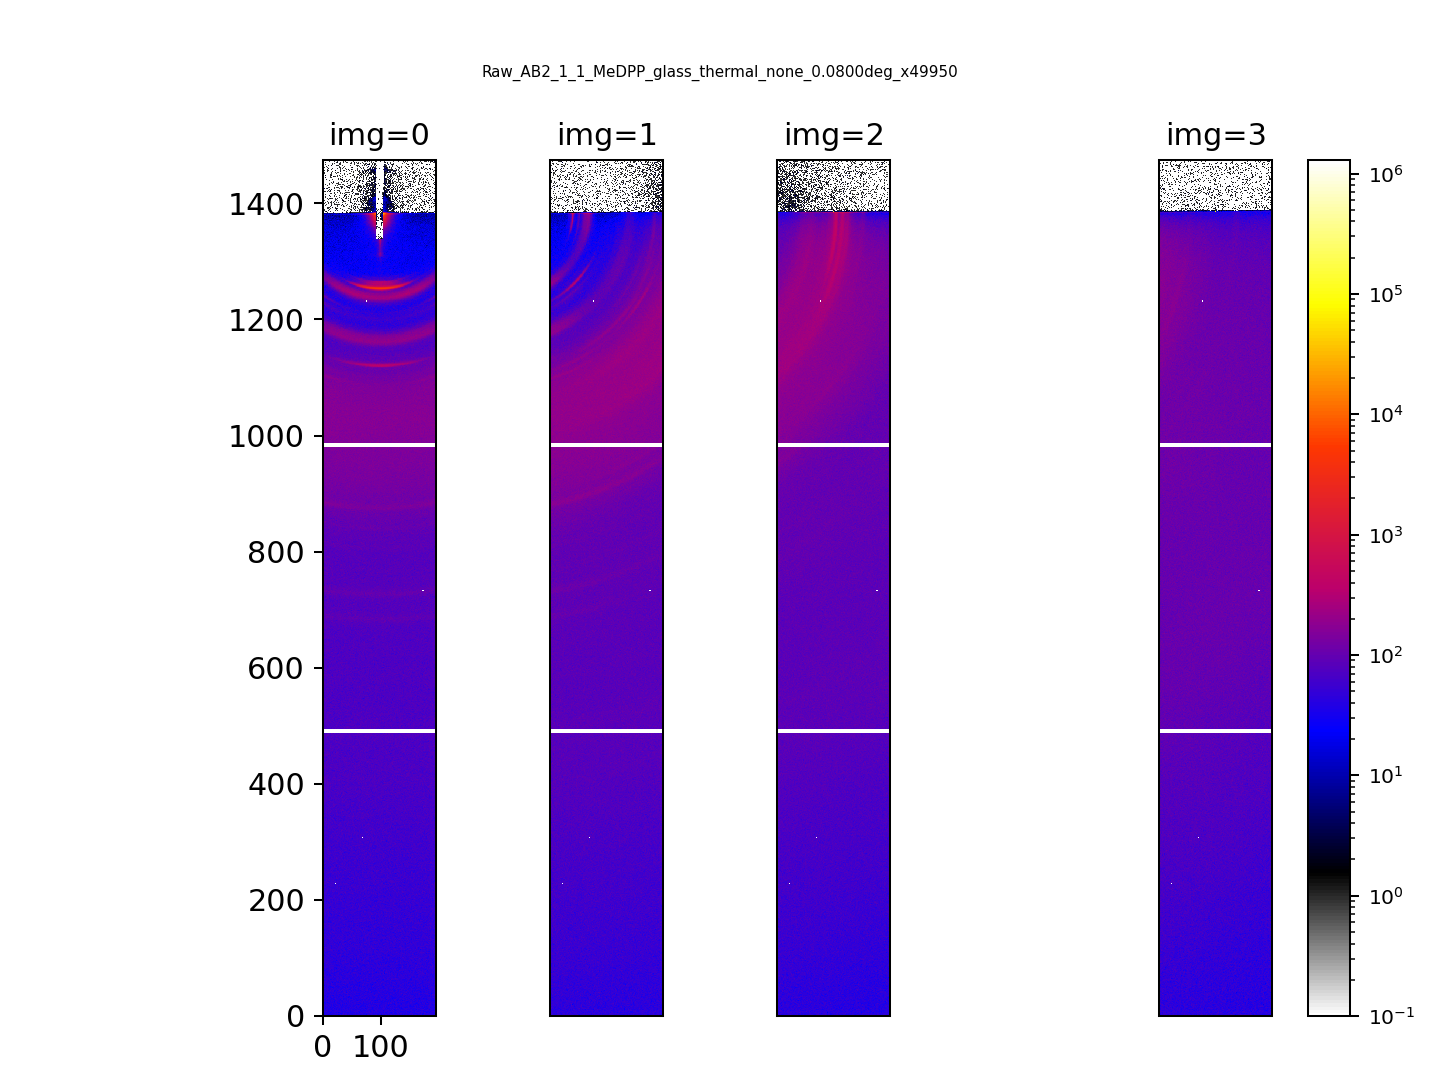

<IPython.core.display.Javascript object>


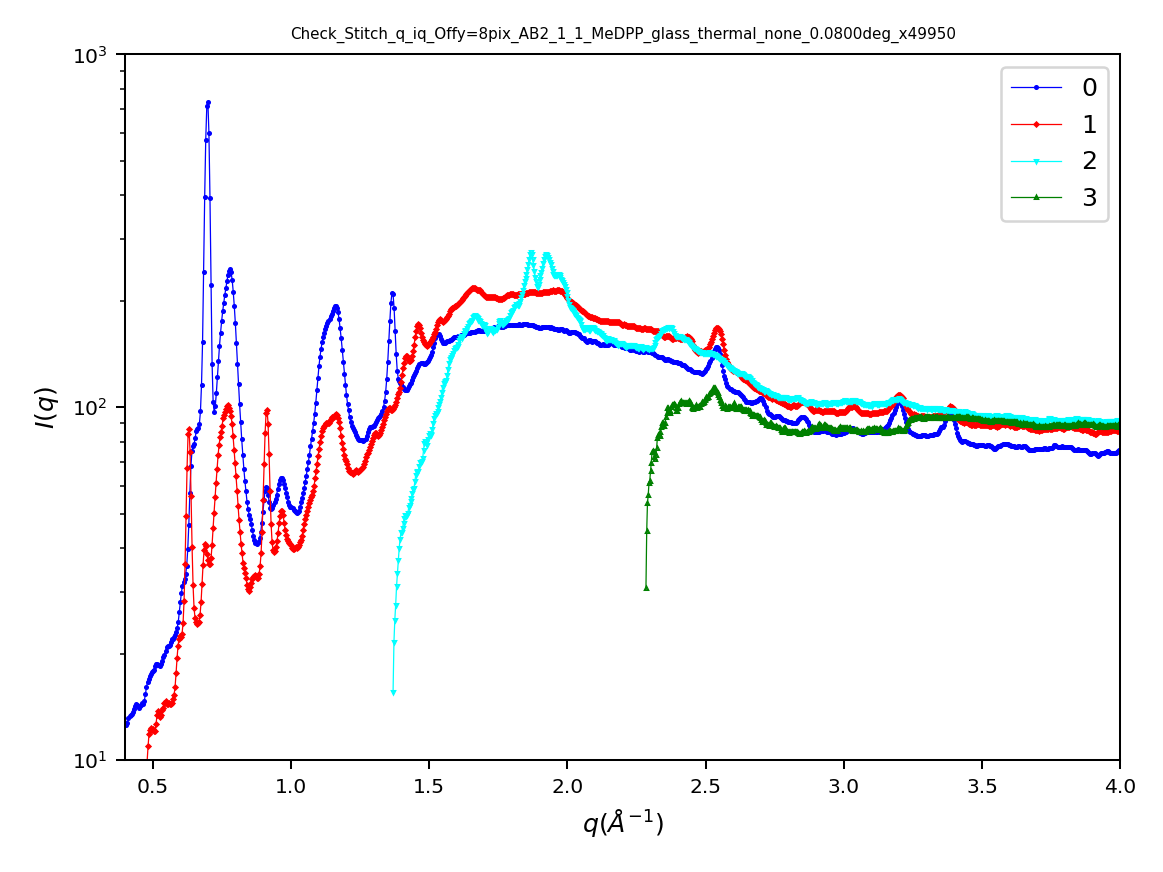

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:1016: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


<IPython.core.display.Javascript object>


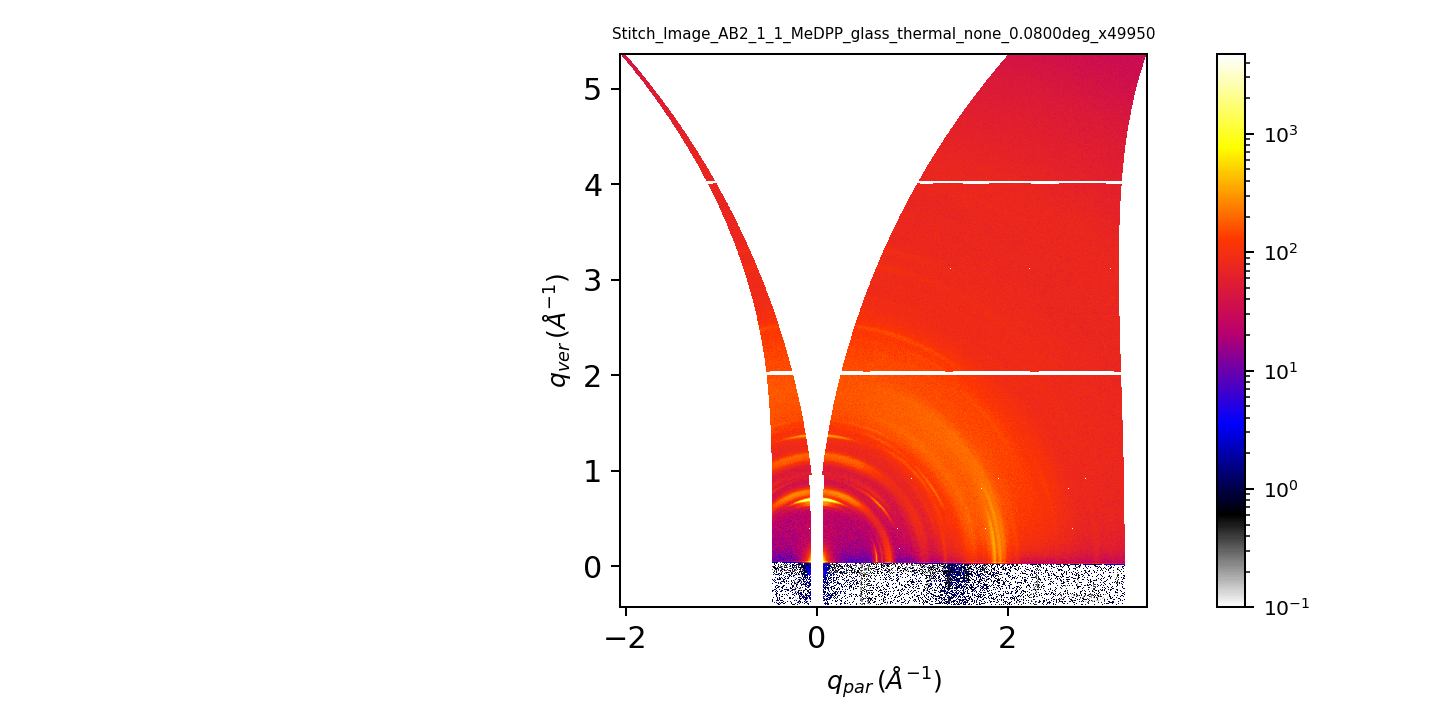

/home/group/Software/pyScatt/pyScatt/plots.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_AB2_1_1_MeDPP_glass_thermal_none_0.0800deg_x49950.csv is saved in /home/group/NSLSII_Data/SMI/2020_Cycle1/AB_CUNNY/TestRes/WAXS/Cir_Avg/


<IPython.core.display.Javascript object>


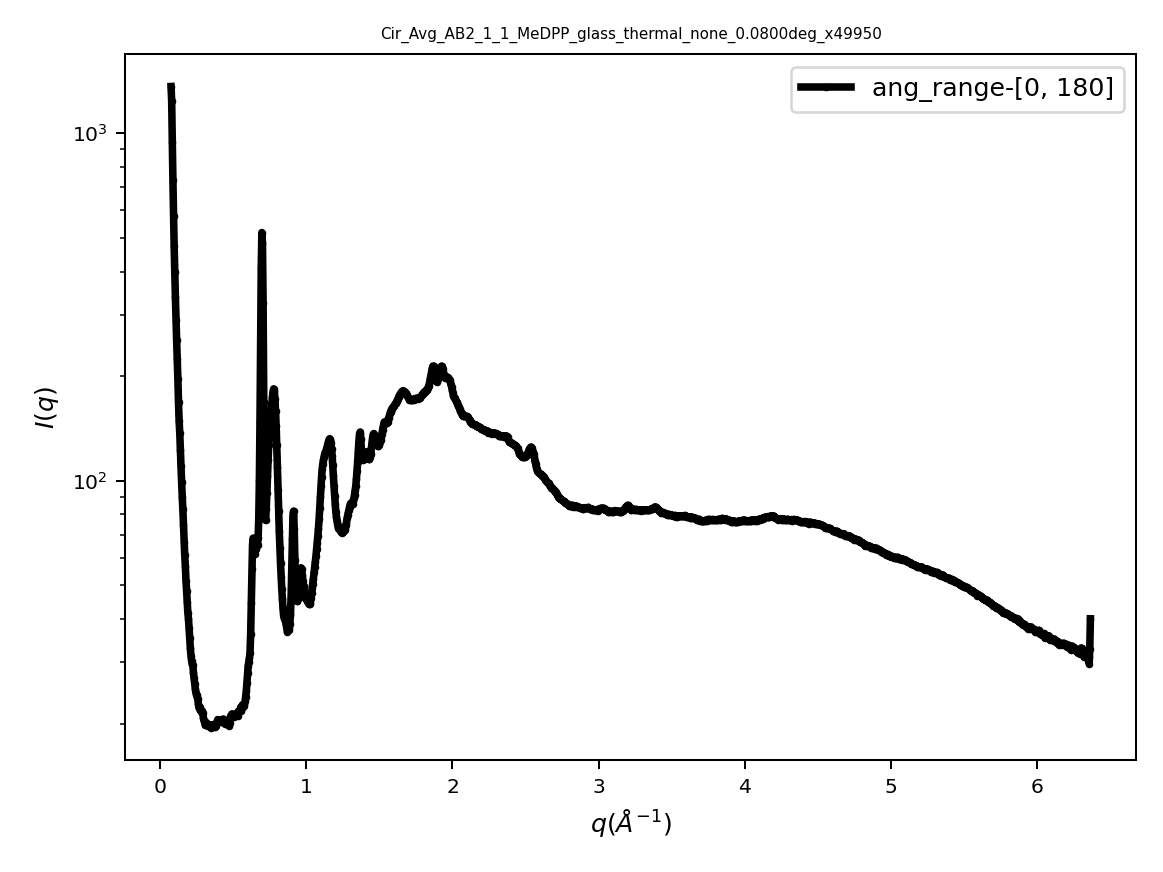

<IPython.core.display.Javascript object>


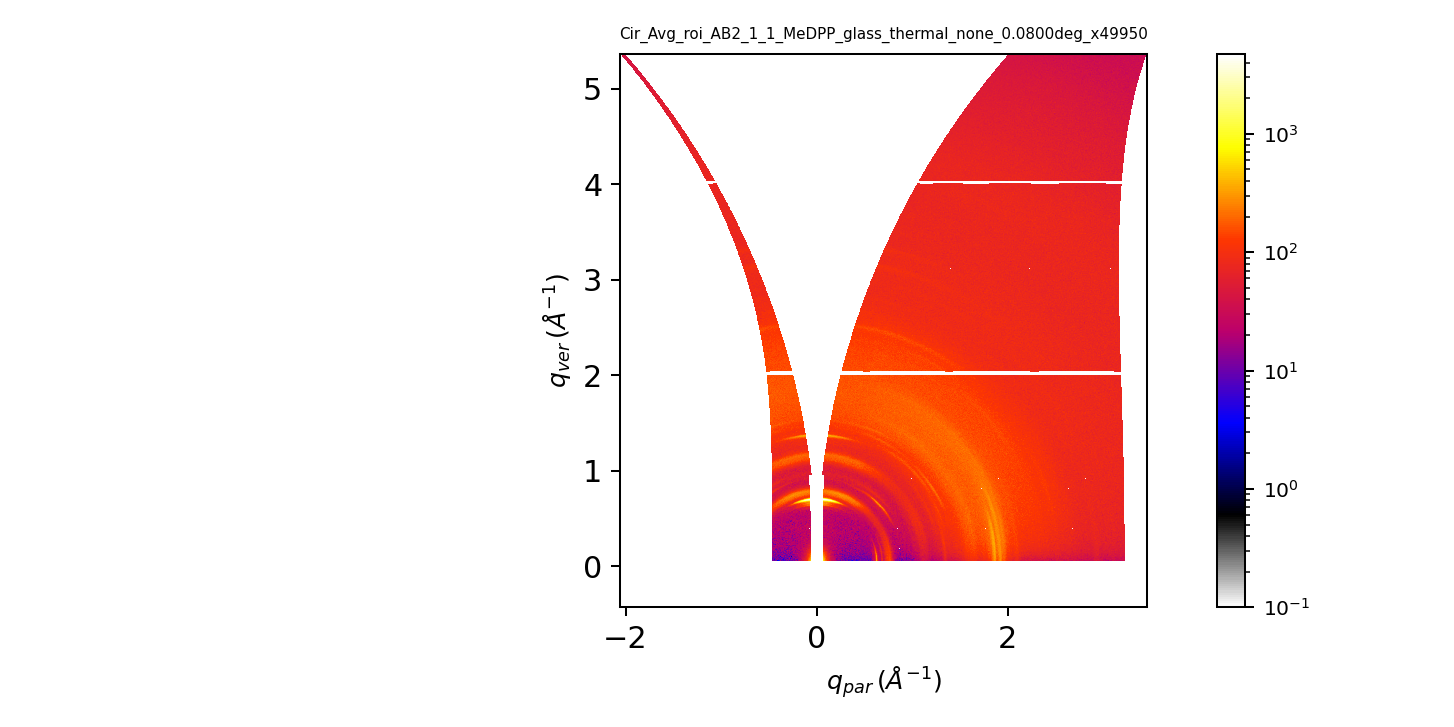

/home/group/Software/pyScatt/pyScatt/plots.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_Sector_AB2_1_1_MeDPP_glass_thermal_none_0.0800deg_x49950_angle=0_20.csv is saved in /home/group/NSLSII_Data/SMI/2020_Cycle1/AB_CUNNY/TestRes/WAXS/Cir_Avg_Sector/
The file: Cir_Avg_Sector_AB2_1_1_MeDPP_glass_thermal_none_0.0800deg_x49950_angle=20_40.csv is saved in /home/group/NSLSII_Data/SMI/2020_Cycle1/AB_CUNNY/TestRes/WAXS/Cir_Avg_Sector/
The file: Cir_Avg_Sector_AB2_1_1_MeDPP_glass_thermal_none_0.0800deg_x49950_angle=40_60.csv is saved in /home/group/NSLSII_Data/SMI/2020_Cycle1/AB_CUNNY/TestRes/WAXS/Cir_Avg_Sector/
The file: Cir_Avg_Sector_AB2_1_1_MeDPP_glass_thermal_none_0.0800deg_x49950_angle=60_80.csv is saved in /home/group/NSLSII_Data/SMI/2020_Cycle1/AB_CUNNY/TestRes/WAXS/Cir_Avg_Sector/
The file: Cir_Avg_Sector_AB2_1_1_MeDPP_glass_thermal_none_0.0800deg_x49950_angle=80_100.csv is saved in /home/group/NSLSII_Data/SMI/2020_Cycle1/AB_CUNNY/TestRes/WAXS/Cir_Avg_Sector/


<IPython.core.display.Javascript object>


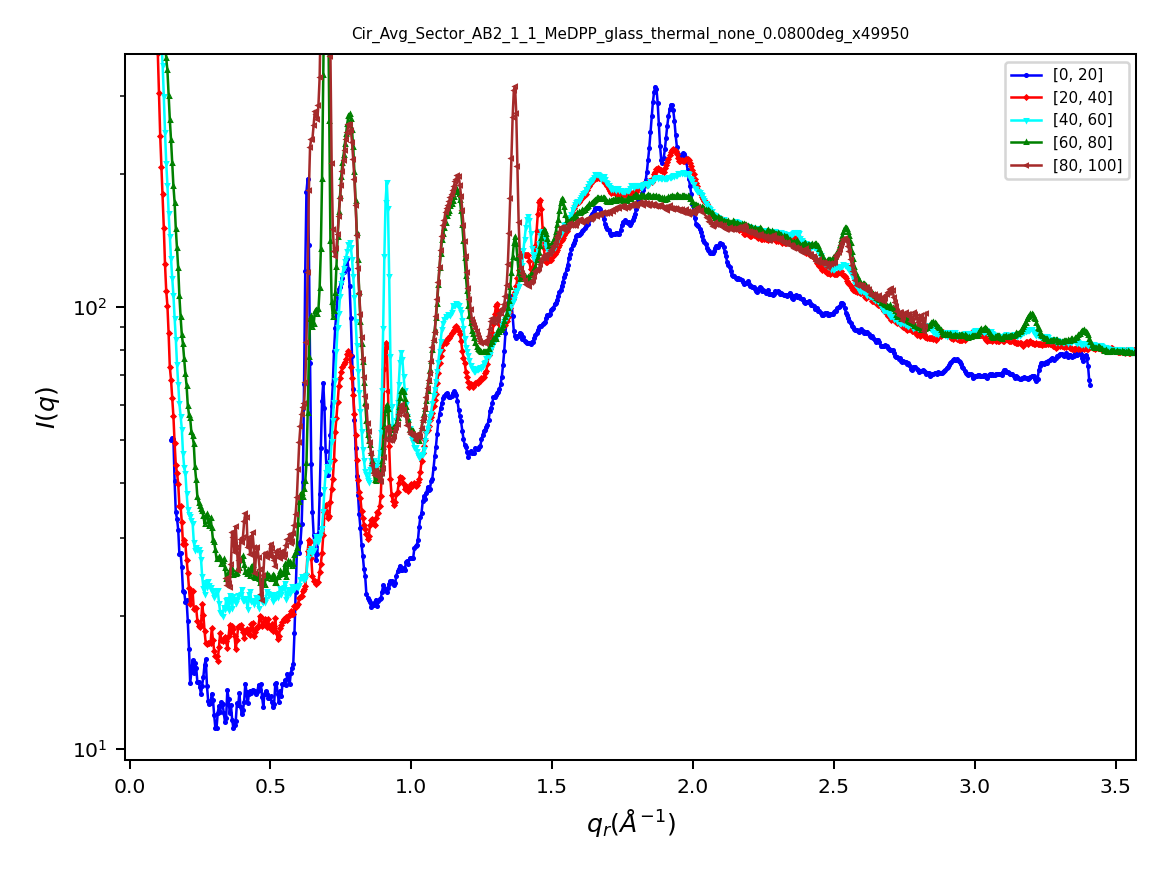

<IPython.core.display.Javascript object>


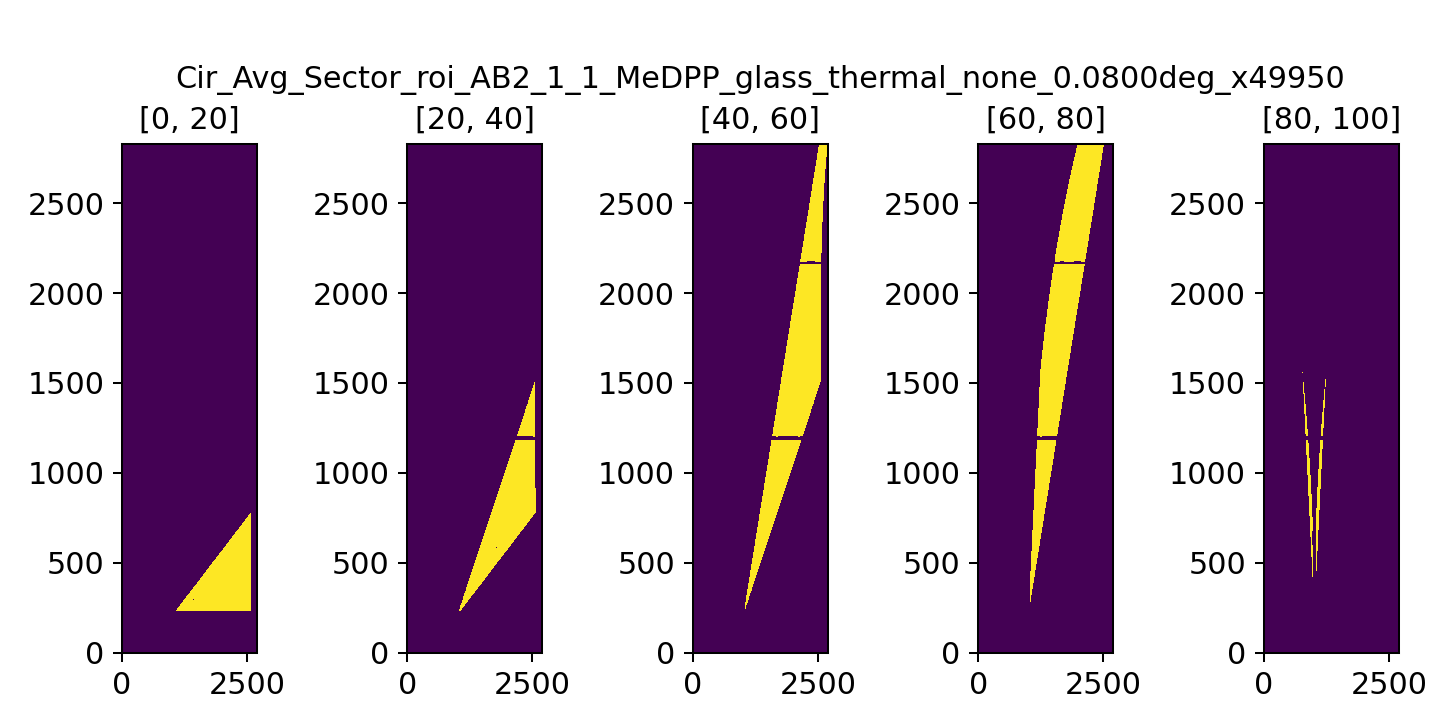

/home/group/Software/pyScatt/pyScatt/generic_functions.py:574: RuntimeWarning: invalid value encountered in true_divide
  return sums/cts


<IPython.core.display.Javascript object>


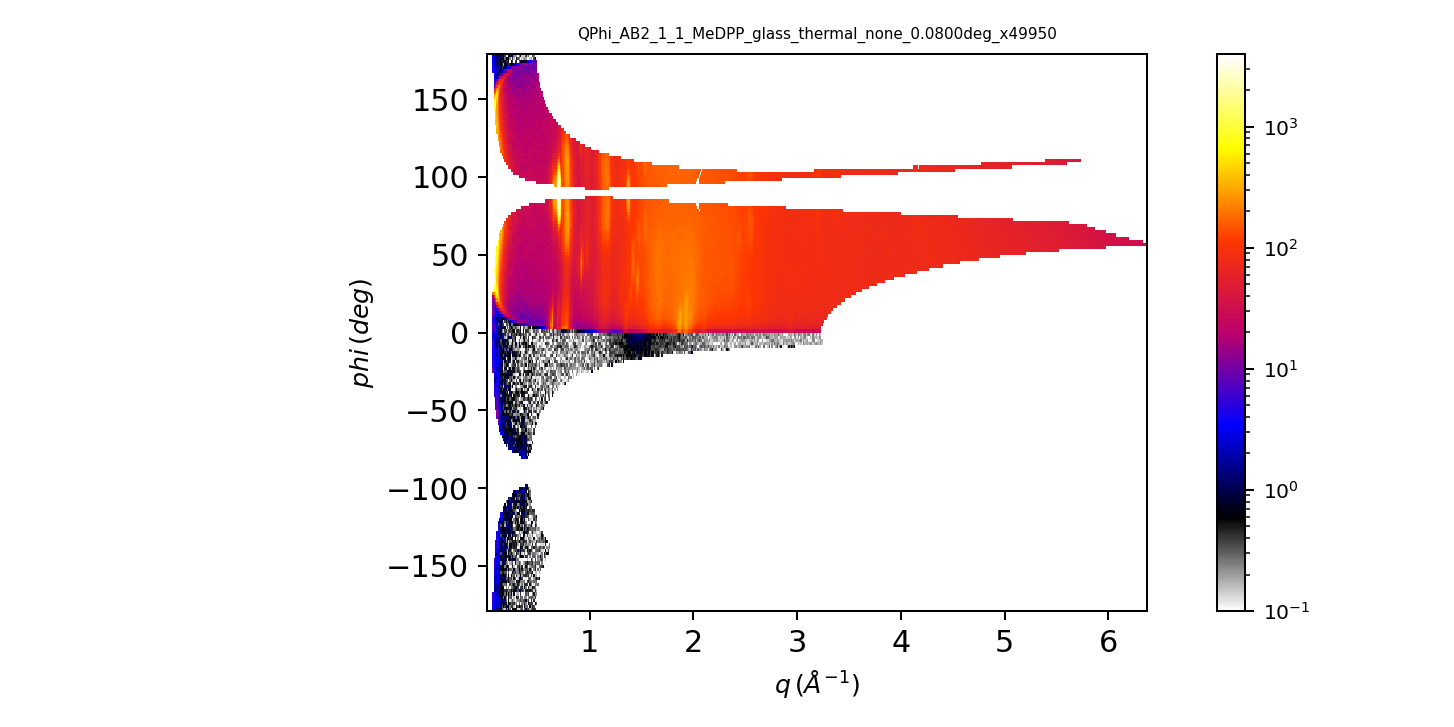

/home/group/Software/pyScatt/pyScatt/plots.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


Done


In [16]:
#loop samples
for sam in sample_list: 
    print( 'The sample is: %s.'%sam)    
    fps = sam_dict[sam] [:4]
    print( 'The filelist for this sample is: %s.'%fps)  
    full_filenames = [ inDir +  fp for fp in fps   ] 
    N =  len(full_filenames)        
    RES = {}
    if det_str ==  'Pilatus300kw': #for WAXS
        PATH = 'WAXS'
        rot_angle = - np.arange( rot_angle_start,  rot_angle_step * N,  rot_angle_step )
        print('The rotation angles are: %s.'%rot_angle)
        pargs_sc['rotation_angles'] = rot_angle
    else:
        PATH = 'SAXS'
    pargs_sc['outDir'] = create_fullpath( outDir + PATH + '/')    
    if geometry  ==  'Reflection':  #for Gi-XS
        p0 = re.search( r'([d][e][g])', sam  ).span()[0]
        inc = float( sam[ p0-6:p0] )
        print('The incident angle is: %s.'%inc)
        pargs_sc['incident_angle'] = inc 
        
        
        
    SC = SMI_Scattering( pargs_sc  ) 
    SC.md['sample'] = sam
    SC.load_data( full_filenames )   
    SC.saved_plots, SC.saved_data  = {}, {}    
    #######################################
    #plot the raw data
    ########################################
    if do_plot_raw:
        run_plot_raw( SC,  vmin= None, vmax=None,mask=None, fontsize=6, )        
    #######################################
    #Stitch WAXS data
    ########################################    
    SC.offset_y   = 8 #8 #-16 #32 #16 # 16 
    if check_stitch:        
        q_ch, iq_ch, int_dict_ch, qx_dict_ch, qz_dict_ch = SC.check_stitich( offset_y = SC.offset_y )  
        peaks = None 
        run_plot_waxs_check_stitch( SC, peaks =peaks,xlim= [.4, 4 ], ylim=[10,1e3],fontsize=6, ) 
    if do_stitch:        
        dq_mag = 5        
        qimg_st, msk_st, qx_st, qz_st, sca_st = SC.stitich( dq_mag = dq_mag, offset_y= SC.offset_y, flag_scale= T ) 
        run_save_stitched_qimage( SC  )         
        run_plot_stitched_qimage( SC  )             
    #######################################
    #Do circular average
    ########################################  
    if do_Qciravg: 
        qz_roi_range= [ 0.05,  qz_st.max() ] 
        qmaskn, q_ca,iq_ca,mask_ca = run_qciravg_st( SC, ciravg_bins=1500, Prange= [0,180], Qrange= None,
                                  qx_roi_range=None,qz_roi_range=qz_roi_range    )
        run_save_qciravg(  SC  )  
        peaks = None 
        run_plot_qciravg( SC, peaks = peaks,xlim= None, ylim=None,fontsize=6, )  
        if show_Qciravg_roi:
            run_plot_qciravg_roi( SC,img_roi=SC.qimg_st*qmaskn,vmin=None,vmax=None,fontsize=6,)        
        
    #######################################
    #Do sector circular average
    ########################################  
    if do_Qciravg_sector:  
        Prange =   [ [w-Qciravg_sector_angle_wid, w+Qciravg_sector_angle_wid] for w in  Qciravg_sector_angles  ]
        qiqs_cas,  qmask_cas = SC.qimg_circular_average_sector(qimg_st , qx_st, qz_st,
                                    Qrange=None,Prange=Prange,bins=1500,mask= qmaskn ) 
        run_save_qciravg_sector( SC  )
        run_plot_qciravg_sector( SC  )        
        if show_Qciravg_sector:
            run_plot_qciravg_sector_roi( SC  )    
            
    #######################################
    #Do q-phi analysis
    ########################################              
    if do_Qqphi:  
        qphi_bins = [ 500, 180 ];Prange= None;Qrange=None;            
        q_QP, phi_QP, qphi_QP, qphi_mask = SC.qimg_to_qphi(SC.qimg_st, SC.qx_st, SC.qz_st,
                                                  Qrange=Qrange,Prange=Prange,                                                      
                                                  bins=qphi_bins,mask=SC.qmask_st) 
        if do_q_qphi:
            q_QPq,  iq_QPq = SC.qphi_to_iq( qphi_QP, q_range=q_QP, p_range=phi_QP, )
        if do_p_qphi:  
            p_QPp,  ip_QPp = SC.qphi_to_ip( qphi_QP, q_range=q_QP, p_range=phi_QP, )            
        run_plot_Qqphi( SC,  fontsize=6, vmin= None, vmax=None, aspect= 0.015, )
                    
   ## save data to h5 file 
    res = SC.res_to_dict( save_raw=save_raw, do_stitch=do_stitch, 
                 do_ciravg = do_Qciravg, do_ciravg_sector = do_Qciravg_sector,
                 do_qimg=do_qimg, do_qphi = do_Qqphi,  
                do_q_qphi = do_q_qphi, do_p_qphi = do_p_qphi,                         
 
                        
                        )                        
 
    K='md';res[K] = {};res[K].update( SC.md   )     
    K='saved_data';res[K] = {};res[K].update( SC.saved_data   )     
    K='saved_plots';res[K] = {};res[K].update( SC.saved_plots   ) 
    
    dicttoh5( res, os.path.join(outDir_HDF, '%s.h5'%sam),
                     h5path='/%s/'%PATH, mode='a', overwrite_data=True)   
    
    
print('Done')       

            

# THE END